# Without Tensorflow

In [1]:
!pip install Pillow
!pip install pandas

import csv
from PIL import Image
import numpy as np
from matplotlib import pyplot
from os import path
import pandas as pd

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
NUM_PEOPLE_TO_READ_IN = 10000
TEST_RATIO = 0.20;

In [3]:
data = {
    "images":np.empty((NUM_PEOPLE_TO_READ_IN*4,50,50,3)),
    "X":np.empty((NUM_PEOPLE_TO_READ_IN*4,50*50*3)),
    "Y":np.empty((NUM_PEOPLE_TO_READ_IN*4))
}

counter = 0
with open('metadata.csv', newline='') as csvfile:
    rows = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in tuple(rows)[1:]:
        
        mask_type = int(row[1])
        filename = row[5]
        
        try:
            image = np.array(Image.open(path.join("data-50x50", str(mask_type), filename))) / 255.0
        except FileNotFoundError:
            image = np.zeros([50,50,3]) # USED FOR DISPLAYING NICELY BELOW / TODO: MAKE SURE TO FILTER THESE AT SOME POINT
            
        data["images"][counter] = image
        data["X"][counter] = np.reshape(image, 50*50*3)
        data["Y"][counter] = mask_type
        
        counter += 1
        if(counter >= NUM_PEOPLE_TO_READ_IN*4):
            break
            
    data["images"] = data["images"]
    data["X"] = data["X"]
    data["Y"] = data["Y"].astype("int")

In [4]:
print(data["images"].shape)
print(data["X"].shape)
print(data["Y"].shape)

(40000, 50, 50, 3)
(40000, 7500)
(40000,)


In [5]:
pd.DataFrame(data["X"])

,0,1,2,3,4,5,6,7,8,9,...,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499
0,0.600000,0.478431,0.458824,0.623529,0.505882,0.474510,0.639216,0.521569,0.490196,0.658824,...,0.015686,0.411765,0.219608,0.243137,0.403922,0.160784,0.180392,0.376471,0.129412,0.160784
1,0.647059,0.529412,0.529412,0.658824,0.541176,0.541176,0.670588,0.560784,0.556863,0.686275,...,0.090196,0.505882,0.231373,0.270588,0.541176,0.243137,0.294118,0.474510,0.192157,0.239216
2,0.698039,0.631373,0.603922,0.713725,0.639216,0.623529,0.733333,0.650980,0.639216,0.745098,...,0.137255,0.352941,0.247059,0.305882,0.549020,0.301961,0.345098,0.427451,0.215686,0.266667
3,0.756863,0.717647,0.721569,0.776471,0.729412,0.737255,0.780392,0.733333,0.749020,0.800000,...,0.309804,0.349020,0.180392,0.247059,0.215686,0.090196,0.141176,0.317647,0.156863,0.219608
4,0.800000,0.749020,0.686275,0.788235,0.737255,0.674510,0.819608,0.764706,0.713725,0.831373,...,0.137255,0.211765,0.176471,0.117647,0.207843,0.180392,0.109804,0.215686,0.180392,0.121569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0.658824,0.698039,0.662745,0.670588,0.709804,0.674510,0.682353,0.721569,0.686275,0.698039,...,0.156863,0.164706,0.125490,0.117647,0.145098,0.101961,0.094118,0.145098,0.101961,0.094118
39996,0.152941,0.039216,0.023529,0.145098,0.031373,0.015686,0.141176,0.027451,0.011765,0.141176,...,0.352941,0.509804,0.360784,0.286275,0.466667,0.337255,0.262745,0.435294,0.305882,0.231373
39997,0.078431,0.015686,0.015686,0.090196,0.035294,0.031373,0.090196,0.035294,0.031373,0.082353,...,0.160784,0.549020,0.490196,0.501961,0.752941,0.611765,0.525490,0.705882,0.564706,0.478431
39998,0.113725,0.035294,0.031373,0.109804,0.039216,0.031373,0.113725,0.043137,0.035294,0.117647,...,0.423529,0.541176,0.482353,0.454902,0.556863,0.482353,0.454902,0.549020,0.474510,0.447059


In [6]:
pd.DataFrame(data["Y"], columns=np.array(["Y"]))

,Y
0,1
1,2
2,3
3,4
4,1
...,...
39995,4
39996,1
39997,2
39998,3


In [7]:
# Maximum of 10000 people (~240MB for .ipynb file) for full dataset
# Maximum of about 1045 people (25MB for .ipynb file) for Jupyter Notebook
# Maximum of about 4180 people (100MB for .ipynb file) for github upload
NUM_PEOPLE_TO_PLOT=100

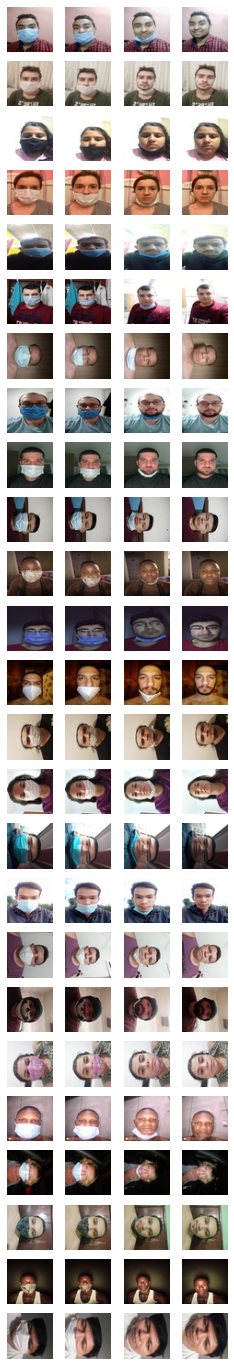

In [8]:
pyplot.figure(figsize=(4, NUM_PEOPLE_TO_PLOT))
counter = 0
for img in data["images"]:
    pyplot.subplot(NUM_PEOPLE_TO_PLOT, 4, counter+1)
    pyplot.axis("off")
    pyplot.imshow(img)
    counter += 1
    if(counter >= NUM_PEOPLE_TO_PLOT):
        break;

In [9]:
#shuffler = np.random.permutation(NUM_PEOPLE_TO_READ_IN*4)

#cut_index = int(NUM_PEOPLE_TO_READ_IN*4*TEST_RATIO)

#x_scaled = data["X"]*2-1

#x_shuffled = x_scaled[shuffler]
#y_shuffled = data["Y"][shuffler]

#x_train = x_shuffled[cut_index:]
#x_test = x_shuffled[0:cut_index]

#y_train = y_shuffled[cut_index:]
#y_test = y_shuffled[0:cut_index]


In [10]:
#print(data["images"].shape)

#print(x_train.shape)
#print(x_test.shape)

#print(y_train.shape)
#print(y_test.shape)